<h1 style='text-align:center;font-weight:bold;color:orange'>Customer Churn Prediction</h1>

## **1 Introduction**
### **1.1 Context**

**Stating from the original source:**

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

**What is E-commerce customer churn?**

Customer churn constitutes a condition where customer choosing not to use a product/services, in the context of "An Online Retail E-commerce Company" because there is no statement regarding whether the company has offline store, then it is safe to assume there is "no offline store" and this Retail Company solely selling through online platform. 

Thus, we will tailor our problem's analysis as well solution and strategies in terms of online purchasing activity. 

**Why Such Things Can Happen?**

There are several underlying factors, such as issues with:

1.   Services Quality
2.   Product Quality
3.   Retention Strategy that is not effective.

**Business Case of E-commerce:**

Importance of Addressing Customer Churn will Impact Revenue:
*   **Cost of Acquisition vs. Retention** : Acquiring a new customer is more expensive 
than retaining an existing one. High churn rates can lead to increased marketing and acquisition costs.

*   **Lifetime Value** : Loyal customers contribute more to the lifetime value (LTV), making churn prediction critical for sustaining revenue.

Justification :   
1.   Why Retaining existing customer cheaper than Customer Acquisition Cost (CAC).
* Factors and Reference :     
  *   **Trust** : Consumers tend to buy from brands they **trust**. This is why it takes a lot more effort to convert a new customer than to hold a loyal one. It can be due to **good customer service**, **ease of use** or **simply because the product solved their problem effectively**. [Forbes](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/) 
  *   **More likelihood to Purchase** : Studies show that existing customers are 50% more likely to try new products and spend 31% more than new customers. [Forbes](https://www.forbes.com/sites/forbesagencycouncil/2020/01/29/the-value-of-investing-in-loyal-customers/?sh=1f4d77a21f6b)



2.   Online Retail Company of Cost of Acquiring Customers(CAC).
  * The average CAC varies across industries. For eCommerce businesses: $70. [Average Customer Acquisition Cost](https://userpilot.com/blog/average-customer-acquisition-cost/)

  *  Some of the larger companies, like Amazon and eBay, pay between 150 dollars and 200 dollars per customer. For smaller online stores, however, this figure is generally closer to $20 per customer.[Average Customer Acquisition in E-Commerce](https://beprofit.co/a/blog/the-customer-acquisition-cost-in-e-commerce-and-industry)

  * Average spend advertising in top a few retail industries: 
  Ecommerce (as a whole): $68 [Customer acquisition cost statistics](https://www.lightspeedhq.com/blog/customer-acquisition-cost/)

### **1.2 Problem Statement**

**Business Problem Statement:**

`How to predict whether customer will churn (stop using product product/services), so we can provide appropriate strategy to retain existing customers.`

**Machine Learning System Objective :** 

  * Input : Customer informations.
  * Output : Whether customer will likely to churn or not.
  * Objective Function : Minimize the difference between "Predicted churn" and "Actual churn".
   
### **1.3 Analytical Approach**
### **1.4 Metrics**
### **1.5 Dataset**
The dataset which was in an Excel file format was obtained from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data). This file consists of two sheets, `Data Dict` (information about each column in the dataset) and `E Comm` (the dataset).
- `CustomerID`: Unique customer ID
- `Churn`: Churn status
- `Tenure`: Tenure of customer in organization
- `PreferredLoginDevie`: Preferred login device of customer
- `CityTier`: City tier
- `WarehouseToHome`: Distance between warehouse to home of customer
- `PreferredPaymentMode`: Preferred payment method of customer
- `Gender`: Gender of customer
- `HourSpendOnApp`: Number of hours spent on mobile app or website
- `NumberOfDeviceRegistered`: Total number of devices registered by a customer
- `PreferedOrderCat`: Preferred order category of customer in last month
- `SatisfactionScore`: Satisfaction score of customer on service
- `MaritalStatus`: Marital status of customer
- `NumberOfAddress`: Total number of address of customer
- `Complain`: Complaint raised in last month
- `OrderAmountHikeFromlastYear`: Percentage of increases in order from last year
- `CouponUsed`: Total number of coupon has been used in last month
- `DaySinceLastOrder`: Day since last order by customer
- `CashbackAmount`: Average cashback in last month

Kindly note whether or not all variables will be used for a data analysis and data modeling will be determined based on the findings during the data exploration. Variables with moderate to high correlations, for example, will be excluded for the next stages to avoid problems in the modeling phase.

In [33]:
# simulate cost for each misclassification

## **2 Initial Inspection**

In [158]:
import pandas as pd                                         # for data wrangling
import numpy as np                                          # for numerical operations
from scipy.stats import skew, kurtosis, kstest, shapiro     # for data distribution
import warnings
warnings.filterwarnings("ignore", category=UserWarning)   
import matplotlib.pyplot as plt
import seaborn as sns       
import missingno as msno
%matplotlib inline

In [111]:
# import dataset
data = pd.read_excel('../data/E Commerce Dataset.xlsx', sheet_name=1)

In [4]:
# create function to inspect df
def inspect_dataframe(df):
    print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
    print(f"- {len(df.select_dtypes(include='number').columns)} are numeric cols")
    print(f"- {len(df.select_dtypes(include='O').columns)} are object cols")
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [5]:
# inspect df
inspect_dataframe(data)

The dataframe contains 5630 rows and 20 cols.
- 15 are numeric cols
- 5 are object cols


,ColumnName,Nrow,DataType,NAPct,DuplicatePct,UniqueValue,Sample
0,CustomerID,5630,int64,0.00,0.0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,5630,int64,0.00,0.0,2,"[1, 0]"
2,Tenure,5630,float64,4.69,0.0,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,5630,object,0.00,0.0,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,5630,int64,0.00,0.0,3,"[3, 1, 2]"
5,WarehouseToHome,5630,float64,4.46,0.0,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,5630,object,0.00,0.0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,5630,object,0.00,0.0,2,"[Female, Male]"
8,HourSpendOnApp,5630,float64,4.53,0.0,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,5630,int64,0.00,0.0,6,"[3, 4, 5, 2, 1, 6]"


**Note**
- The dataset contains 5630 rows and 20 columns, consisting 5 object columns and 15 numerical columns. The 5 object cols will later need to be represented in the form of numerical format so they can be modeled together with the rest columns.
- No duplicates were found in the dataset so no treatments are needed.
- Missing values found in 7 columns, namely `Tenure` (4.69%), `WarehouseToHome` (4.46%), `HourSpendOnApp` (4.53%), `OrderAmountHikeFromlastYear` (4.71), `CouponUsed` (4.55), `OrderCount` (4.58), and `DaySinceLastOrder` (5.45%). These columns should be investigated further to understand the mechanisms of the missingness and what treatment is appropriate each condition.

In [7]:
# get statistical summary for numerical var
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.50,1625.39,50001.0,51408.25,52815.50,54222.75,55630.00
Churn,5630.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Tenure,5366.0,10.19,8.56,0.0,2.00,9.00,16.00,61.00
CityTier,5630.0,1.65,0.92,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5379.0,15.64,8.53,5.0,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.0,2.93,0.72,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.0,3.69,1.02,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5630.0,3.07,1.38,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5630.0,4.21,2.58,1.0,2.00,3.00,6.00,22.00
Complain,5630.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00


**Note**
- What is apparent is column `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`, and `CasbackAmount` contain outliers as the max value far greater than the 75% values. However, it is important to remember this is just an initial inspection. The values will change as the duplicates will be removed. And a deeper check with a statistical technique will be done to check whether or not the aforementioned columns contain outliers.
- Lorem ipsum

<div class="alert alert-block alert-warning">
<b>Next steps for data preprocessing</b><br>

- Handle missing values

- Convert object cols to numeric

- Rescale numbers

- Check imbalance distribution of the target variable
</div>

In [118]:
# check churn rate
data['Churn'].value_counts(normalize=True).reset_index(name='rate')

,index,rate
0,0,0.831616
1,1,0.168384


## **3 Exploratory Data Analysis**

### **3.1 Check Missing Values**

Several options to test patterns of missingness in dataset can be used such as a simple examination on missing value counts, chi-square test, a correlation test, 

In [186]:
missing_values = data.isna().sum()
missing_values_percentage = data.isna().mean() * 100

missing_values_df = pd.DataFrame({
    'Count': missing_values,
    'Percentage': missing_values_percentage.round(3)
})

missing_values_df.sort_values(by='Count', ascending=False)

,Count,Percentage
DaySinceLastOrder,307,5.453
OrderAmountHikeFromlastYear,265,4.707
Tenure,264,4.689
OrderCount,258,4.583
CouponUsed,256,4.547
HourSpendOnApp,255,4.529
WarehouseToHome,251,4.458
CustomerID,0,0.000
MaritalStatus,0,0.000
CashbackAmount,0,0.000


As previously noted, columns `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`), column `DaySinceLastOrder` contain missing values. The missing value rates are around 4.0 (rounded down). Mechanisms of missingness will be performed to understand the patterns. However, before moving forward, data distribution check should be firstly done as investigating the mechanisms of missing data will require a statistical test. The outcome of the distribution check is therefore to inform what statistical test should be chosen based on the characteristic of the data.

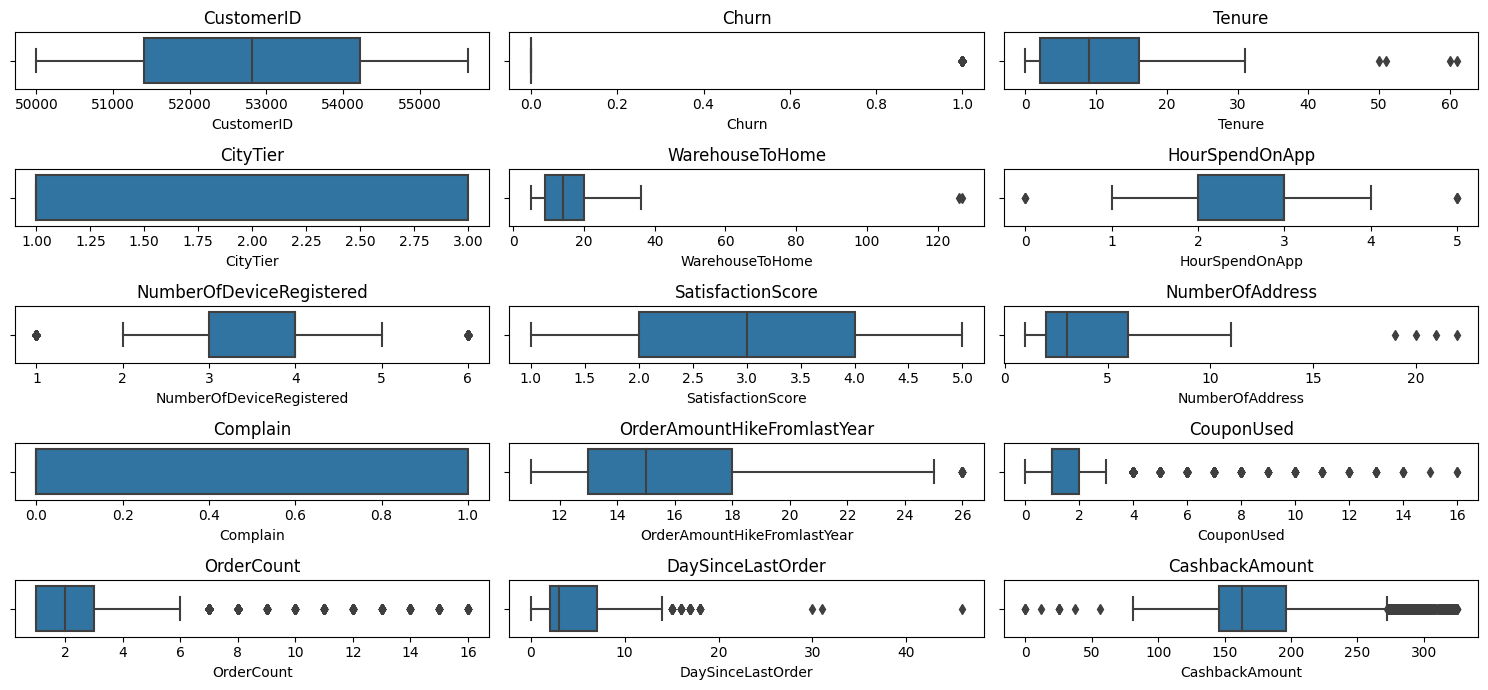

Total cols containing missing values: 15


In [159]:
# define num cols
numerical_columns = data.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7))

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()
print(f'Total cols containing missing values: {len(numerical_columns.columns)}')

**Note**: As the data in the majority of columns are not normally distributed, nonparameteric techniques can be used for a further analysis on correlations.

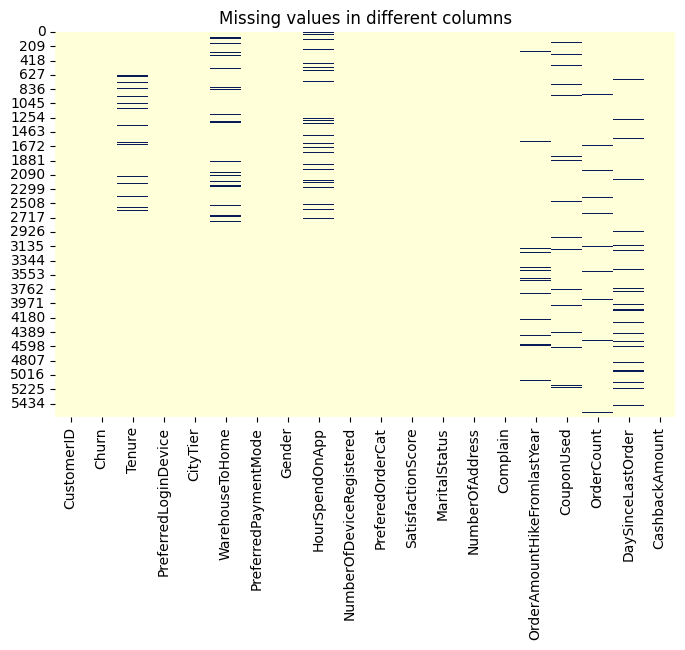

In [160]:
# check columns with missing values
plt.figure(figsize=(8,5))
sns.heatmap(data.isna(), cmap='YlGnBu', cbar=False)
plt.title('Missing values in different columns')
plt.show()

**Note**: At glance, it seems that the missing values in column `Tenure`, `WarehouseToHome`, and `HourSpendOnApp` only appear in the beginning of the dataset but the missingness between columns doesn't look to correspond to each other. For example, if row ID 977 (see dataframe below) in column `WarehouseToHome` is missing, values in other columns are not.

In [165]:
data.loc[:, ['Tenure', 'WarehouseToHome', 'HourSpendOnApp']].sample(n=10, random_state=42)

,Tenure,WarehouseToHome,HourSpendOnApp
4331,1.0,7.0,4.0
1988,15.0,9.0,3.0
3443,13.0,29.0,3.0
4559,5.0,7.0,4.0
4898,13.0,7.0,4.0
4641,8.0,7.0,3.0
2117,29.0,15.0,NaN
3268,12.0,9.0,4.0
977,9.0,NaN,3.0
1115,12.0,6.0,3.0


In [167]:
# subset cols with missing values
subset_data = data[data.columns[data.isna().any()]]

# display data
display(subset_data.sample(10, random_state=42))

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
4331,1.0,7.0,4.0,22.0,2.0,2.0,1.0
1988,15.0,9.0,3.0,13.0,1.0,1.0,3.0
3443,13.0,29.0,3.0,14.0,2.0,NaN,9.0
4559,5.0,7.0,4.0,13.0,4.0,4.0,3.0
4898,13.0,7.0,4.0,17.0,10.0,NaN,9.0
4641,8.0,7.0,3.0,14.0,2.0,2.0,4.0
2117,29.0,15.0,NaN,19.0,1.0,1.0,3.0
3268,12.0,9.0,4.0,13.0,5.0,5.0,13.0
977,9.0,NaN,3.0,21.0,0.0,1.0,2.0
1115,12.0,6.0,3.0,15.0,3.0,5.0,8.0


**Note**: There seem to be no apparent or explicit patterns in the missing values between variables. What is meant by explicit is when a value in one variable is empty (`NaN`), that in another variable will be empty too or have monotonous values. Or else, the patterns of missingness are not in the surface level so a deeper check should be done.

Mechanisms of missing values can be further explored by exploiting Spearman correlation test. This non-parametric test is more considered as the majority of variables indicate non-normal data distribution. Moreover, Spearman correlation test can evaluate the relationship between missing values and other variables.

In [168]:
# check correlation
(subset_data.corr(method='spearman')
 .style.background_gradient(cmap='YlOrRd')
 .format('{:.3f}'))

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
Tenure,1.000,-0.046,-0.004,0.014,0.124,0.174,0.205
WarehouseToHome,-0.046,1.000,0.081,0.042,0.017,0.023,0.025
HourSpendOnApp,-0.004,0.081,1.000,0.135,0.323,0.304,0.107
OrderAmountHikeFromlastYear,0.014,0.042,0.135,1.000,0.071,0.058,0.001
CouponUsed,0.124,0.017,0.323,0.071,1.000,0.727,0.319
OrderCount,0.174,0.023,0.304,0.058,0.727,1.000,0.469
DaySinceLastOrder,0.205,0.025,0.107,0.001,0.319,0.469,1.000


**Note**
- The dataframe above displays how missing values in one column is correlated with missing values in another.
- Column `OrderCount` is highly correlated with `CouponUsed` ($\rho$ = 0.727), and has a moderate correlation ($\rho$ = 0.469).
- This output is expected as the higher number of orders, values in other variables (e.g., `CouponUsed`, `DaySinceLastOrder`) ideally should be higher as well because customers who make more purchases usually get and use more coupons.

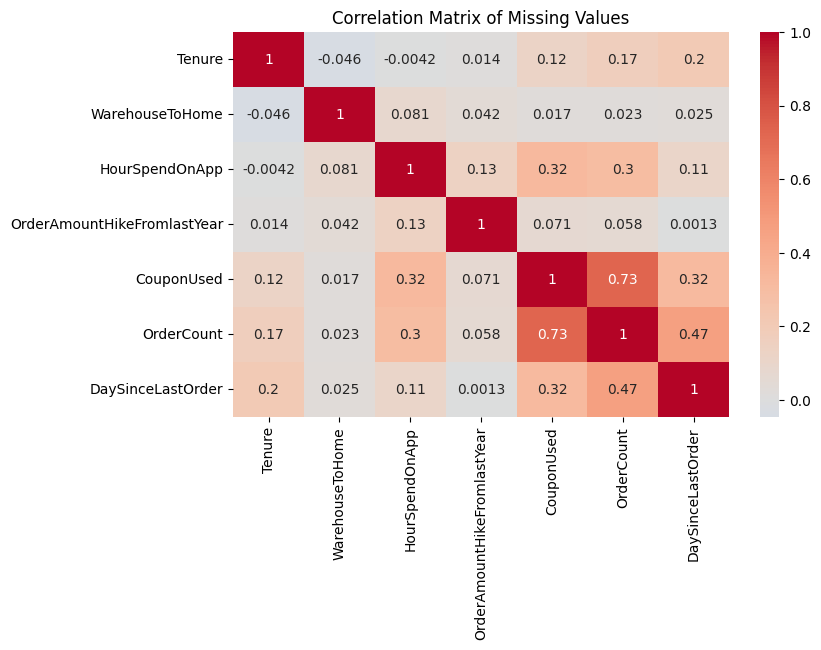

In [191]:
# Correlation matrix of missing values: BOLEH DIHAPUS...
missing_corr = data[data.columns[data.isna().any()]].corr(method='spearman')
plt.figure(figsize=(8, 5))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Missing Values')
plt.show()

A chi-square test will be used to assess whether the probability of values being missing is associated with the value itself (MNAR) or independent of the value (either MAR or MCAR). To make it more explicit, probability of missing values independent of the values themselves is the null hypothesis ($H_0$).

In [203]:
from scipy import stats

categorical_columns = data.select_dtypes(include=['object']).columns

chi2_tests_results = {}
for col in categorical_columns:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[col], data['OrderCount_missing']))
    chi2_tests_results[col] = (chi2, p)

chi2_results_df = pd.DataFrame.from_dict(chi2_tests_results, orient='index', columns=['Chi-Square', 'p-value'])
display(chi2_results_df)

,Chi-Square,p-value
PreferredLoginDevice,78.278645,1.004635e-17
PreferredPaymentMode,106.521847,1.089348e-20
Gender,12.881280,3.318852e-04
PreferedOrderCat,1071.940947,1.593202e-229
MaritalStatus,8.690191,1.297027e-02


**Note**: 
- Based on the chi-squared ($\chi^2$) test, all variables above are significantly associated with `OrderCount`, meaning that the values in `OrderCount` depend on those in `PreferredLoginDevice`, `PreferredpaymentMode`, `Gender`, `PreferredOrderCat`, and `MaritalStatus` (rejecting the null hypothesis (MNAR) with $\alpha$ at 0.05). This result suggests that the mechanism of missingness is likely MAR as the missingness is related to the observed values.
- To addresss the missingness with such characteristic, Multiple Imputation with Chained Equation (MICE) can be an option.